In [1]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt

%matplotlib inline
from tqdm import tqdm_notebook
#from sklearn.preprocessing import StandardScaler
#from sklearn.svm import NuSVR, SVR
#from sklearn.metrics import mean_absolute_error
pd.options.display.precision = 15

#import lightgbm as lgb
#import xgboost as xgb
#import time
#import datetime

#from sklearn.preprocessing import LabelEncoder
#from sklearn.model_selection import StratifiedKFold, KFold, RepeatedKFold
#from sklearn.metrics import mean_squared_error, mean_absolute_error
#from sklearn.linear_model import Ridge, RidgeCV
#import gc
#from catboost import CatBoostRegressor
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
%%time
train = pd.read_csv('../input/train.csv', dtype={'acoustic_data': np.int16, 'time_to_failure': np.float32})

CPU times: user 2min 19s, sys: 19.8 s, total: 2min 39s
Wall time: 2min 41s


In [3]:
print(train.head())
train.shape

   acoustic_data    time_to_failure
0             12  1.469099998474121
1              6  1.469099998474121
2              8  1.469099998474121
3              5  1.469099998474121
4              8  1.469099998474121


(629145480, 2)

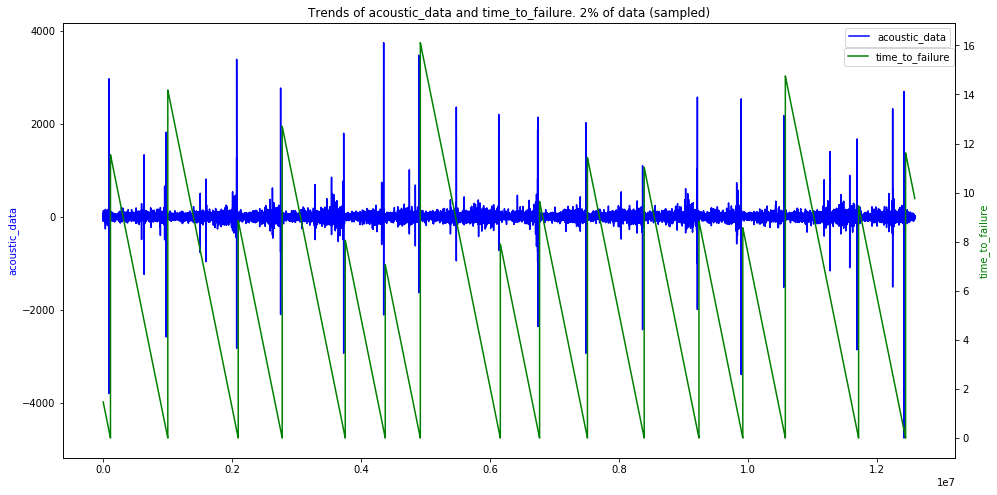

In [4]:
#plotting a sample of all data- 1 of 50
train_acoustic_data_small = train['acoustic_data'].values[::50]
train_time_to_failure_small = train['time_to_failure'].values[::50]

fig, ax1 = plt.subplots(figsize=(16, 8))
plt.title("Trends of acoustic_data and time_to_failure. 2% of data (sampled)")
plt.plot(train_acoustic_data_small, color='b')
ax1.set_ylabel('acoustic_data', color='b')
plt.legend(['acoustic_data'])
ax2 = ax1.twinx()
plt.plot(train_time_to_failure_small, color='g')
ax2.set_ylabel('time_to_failure', color='g')
plt.legend(['time_to_failure'], loc=(0.875, 0.9))
plt.grid(False)

del train_acoustic_data_small
del train_time_to_failure_small

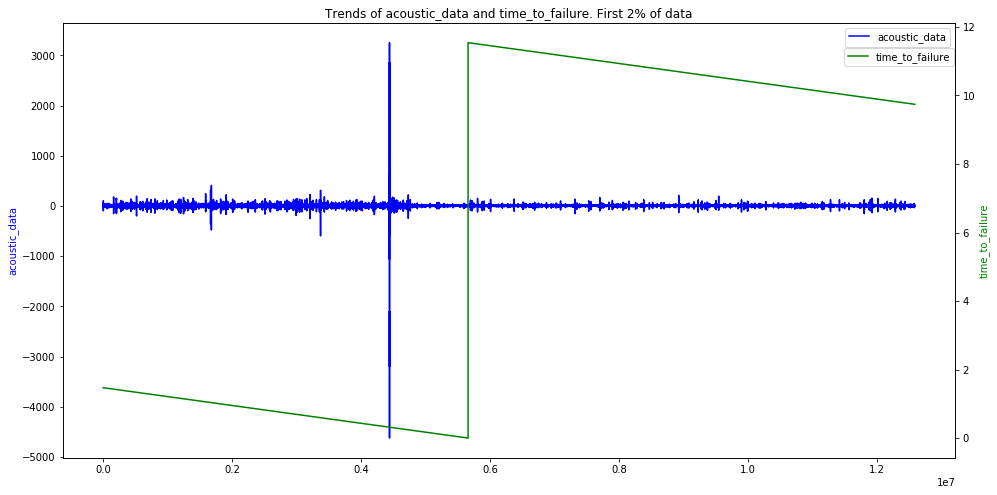

In [5]:
#first 2% of all the data
fig, ax1 = plt.subplots(figsize=(16, 8))
plt.title("Trends of acoustic_data and time_to_failure. First 2% of data")
plt.plot(train['acoustic_data'].values[:12582910], color='b')
ax1.set_ylabel('acoustic_data', color='b')
plt.legend(['acoustic_data'])
ax2 = ax1.twinx()
plt.plot(train['time_to_failure'].values[:12582910], color='g')
ax2.set_ylabel('time_to_failure', color='g')
plt.legend(['time_to_failure'], loc=(0.875, 0.9))
plt.grid(False)

On the first plot you can see 2% of all data (all data skipping each 50 rows). We can see that usually acoustic data shows huge fluctuations just before the failure and the nature of data is cyclical.

On the second plot we see first 2% of the data. It seems that at first the signal has huge fluctuations for a short time, then it lowers and after some time the earthquake occurs. I think it will be quite diffucult to distinguish target values properly

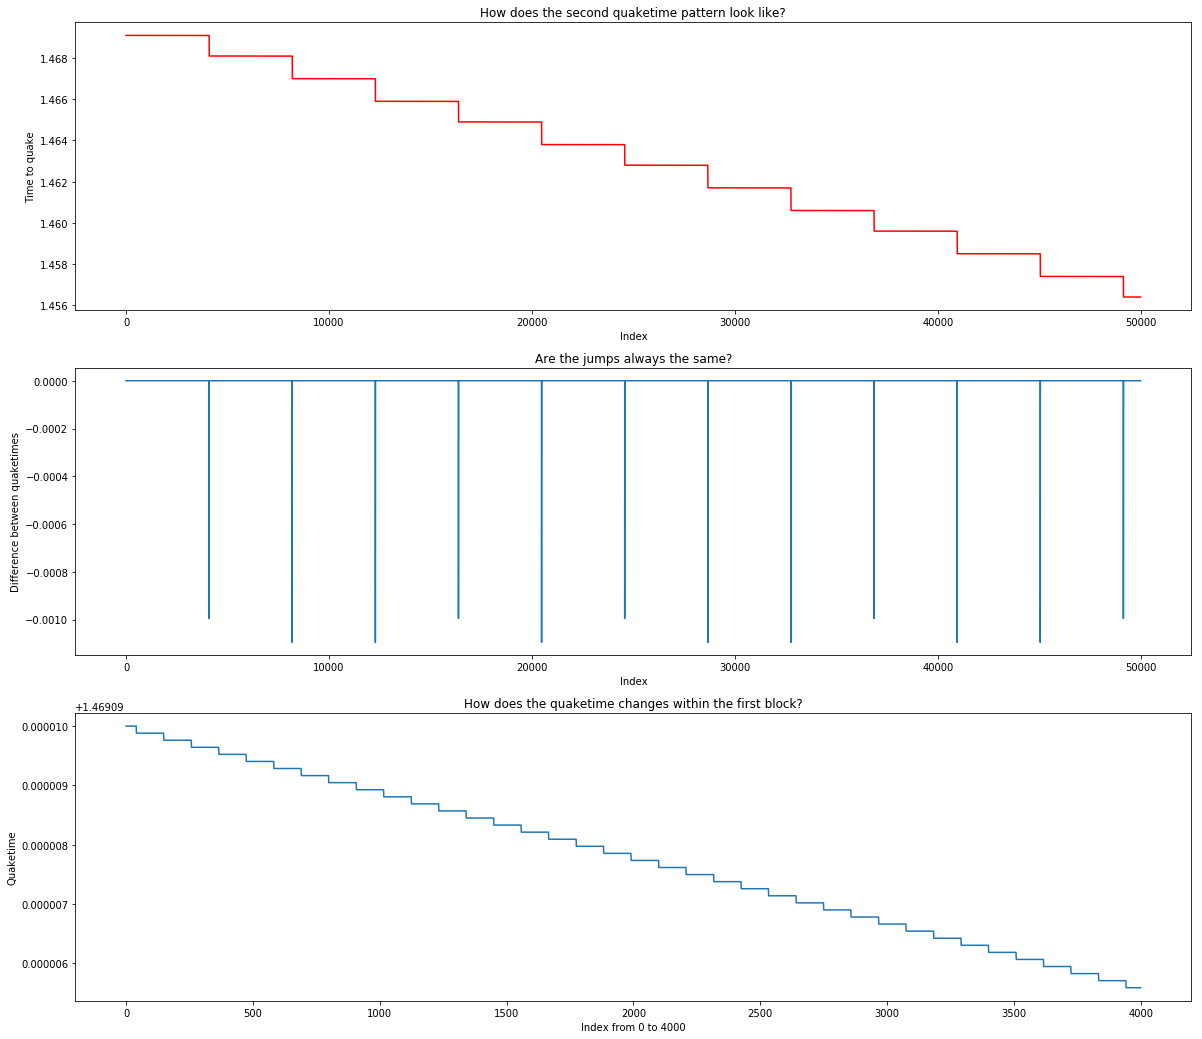

In [7]:
fig, ax = plt.subplots(3,1,figsize=(20,18))
ax[0].plot(train.index.values[0:50000], train.time_to_failure.values[0:50000], c="Red")
ax[0].set_xlabel("Index")
ax[0].set_ylabel("Time to quake")
ax[0].set_title("How does the second quaketime pattern look like?")
ax[1].plot(train.index.values[0:49999], np.diff(train.time_to_failure.values[0:50000]))
ax[1].set_xlabel("Index")
ax[1].set_ylabel("Difference between quaketimes")
ax[1].set_title("Are the jumps always the same?")
ax[2].plot(train.index.values[0:4000], train.time_to_failure.values[0:4000])
ax[2].set_xlabel("Index from 0 to 4000")
ax[2].set_ylabel("Quaketime")
ax[2].set_title("How does the quaketime changes within the first block?");

The first plot shows that the quaketime seems to stay almost constant up to index 4000. Then a steep decrease occurs. Afterwards this kind of pattern is repeated.

The second plot reveals that the second jump of the quaketime is larger than the first and the third jump is again smaller i.e. not all jumps are same.

The third plot shows that the quaketime within such a "constant" block is not really constant but linear decreasing even though with very small numbers.